In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
city_name = 'CityD'
df = pd.read_csv("/Users/yulin/Desktop/人流/"+city_name+"fill.csv")

# Step 1: Group the days into weeks (7-day cycles)
# Day 0-6 is one week, 7-13 is the second, and so on
df['day_of_week'] = (df['d'] % 7)  # 0=Sunday, 6=Saturday

# Step 2: Convert 't' into hours (each timeslot represents a 30-minute interval)
df['hour'] = df['t'] // 2  # Convert 0-47 timeslot into 0-23 hour

# Step 3: Initialize a 7x24 matrix for each user這個矩陣代表一週中每個小時的數據
def create_weekly_hour_matrix(df):
    matrix = np.zeros((7, 24))  # 7 days, 24 hours
    for day in range(7):
        for hour in range(24):
            # Filter data for specific day and hour
            day_hour_data = df[(df['day_of_week'] == day) & (df['hour'] == hour)]
            
            # 測試用的 print 語句，印出當前的 day, hour 和篩選後的數據
            print(f"Day: {day}, Hour: {hour}, Data Size: {len(day_hour_data)}")

            if not day_hour_data.empty:
                # Find the most frequent location (x, y combination)
                most_frequent_loc = day_hour_data.groupby(['x', 'y']).size().idxmax()
                # 測試用的 print 語句，印出最常出現的座標位置
                print(f"Most Frequent Location for Day {day}, Hour {hour}: {most_frequent_loc}")
                
                # Calculate the occurrence ratio of the most frequent location
                top_loc_count = day_hour_data.groupby(['x', 'y']).size().max()
                total_count = len(day_hour_data)

                # 測試用的 print 語句，印出該地點的出現次數及其比例
                print(f"Top Location Count: {top_loc_count}, Total Count: {total_count}")
                
                matrix[day, hour] = top_loc_count / total_count
            else:
                matrix[day, hour] = 0  # No data for this day/hour
    return matrix

In [5]:
# 測試某一用戶的數據
df_uid = df[df['uid'] == 1]  # 假設篩選 uid = 1 的數據
weekly_hour_matrix = create_weekly_hour_matrix(df_uid)


Day: 0, Hour: 0, Data Size: 22
Most Frequent Location for Day 0, Hour 0: (32, 5)
Top Location Count: 8, Total Count: 22
Day: 0, Hour: 1, Data Size: 22
Most Frequent Location for Day 0, Hour 1: (32, 5)
Top Location Count: 9, Total Count: 22
Day: 0, Hour: 2, Data Size: 22
Most Frequent Location for Day 0, Hour 2: (32, 5)
Top Location Count: 10, Total Count: 22
Day: 0, Hour: 3, Data Size: 22
Most Frequent Location for Day 0, Hour 3: (32, 5)
Top Location Count: 10, Total Count: 22
Day: 0, Hour: 4, Data Size: 22
Most Frequent Location for Day 0, Hour 4: (32, 5)
Top Location Count: 9, Total Count: 22
Day: 0, Hour: 5, Data Size: 22
Most Frequent Location for Day 0, Hour 5: (32, 5)
Top Location Count: 10, Total Count: 22
Day: 0, Hour: 6, Data Size: 22
Most Frequent Location for Day 0, Hour 6: (33, 5)
Top Location Count: 6, Total Count: 22
Day: 0, Hour: 7, Data Size: 22
Most Frequent Location for Day 0, Hour 7: (32, 5)
Top Location Count: 8, Total Count: 22
Day: 0, Hour: 8, Data Size: 22
Most F

In [ ]:
for uid in unique_users[:10]:
    user_data = df[df['uid'] == uid]
    user_matrices[uid] = create_weekly_hour_matrix(user_data)
    for i in range(7):
        for j in range(24):
            if user_matrices[uid][i][j] > 0.5:
                stable_matrix[i*24+j][0] +=1

print(stable_matrix)

In [48]:
# Step 4: Calculate the matrix for each unique user
# Step 5: create a 168*1 matrix , initialize 0 , if the value is greater than 0.5, add 1
percent=0.4
sample_size = 500  # 定義要隨機抽樣的使用者數量

unique_users = df['uid'].unique()
# 隨機抽樣使用者
sampled_users = np.random.choice(unique_users, size=sample_size, replace=False)
user_matrices = {} #空字典，用於存儲每個使用者的矩陣
stable_matrix = np.zeros((1,169))
cnt = 0  # Initialize cnt variable
for uid in sampled_users:
    user_data = df[df['uid'] == uid]
    user_matrices[uid] = create_weekly_hour_matrix(user_data)
    for i in range(7):
        for j in range(24):
            if user_matrices[uid][i][j] >= percent:
                cnt+=1
    print(cnt)
    stable_matrix[0][cnt] +=1
    cnt = 0

print(stable_matrix)

9
80
93
58
87
0
42
49
28
85
42
163
33
28
43
83
80
38
120
26
83
35
38
52
117
99
51
6
41
82
17
54
105
116
75
104
0
40
32
105
49
51
103
130
32
129
19
16
61
21
60
39
97
20
54
18
68
59
134
47
111
73
13
92
40
167
126
81
112
0
81
56
33
18
88
131
11
85
65
0
89
85
50
99
87
105
92
55
25
89
0
27
27
50
0
116
0
25
110
10
23
17
2
49
46
49
84
6
38
33
30
39
52
88
88
19
42
7
48
2
0
69
58
12
161
71
63
52
0
16
92
46
94
148
55
49
53
28
70
51
10
0
104
82
69
75
57
91
62
10
120
2
18
90
36
35
26
20
11
32
72
88
34
87
22
77
100
27
164
75
66
1
72
46
42
91
166
47
42
78
44
102
59
90
29
47
18
0
96
1
7
7
115
82
60
72
43
71
83
54
82
55
16
20
19
30
39
117
11
79
0
25
118
55
2
69
44
12
49
20
0
92
38
61
81
73
25
107
16
85
152
71
4
146
21
66
36
37
0
23
20
36
62
77
161
40
58
68
84
0
101
122
44
1
30
31
49
0
144
53
59
30
63
107
92
118
150
41
29
2
105
46
13
38
96
36
24
7
66
52
17
18
59
30
33
80
126
66
11
136
86
30
26
83
32
49
85
12
12
30
106
58
99
26
34
8
34
60
52
50
0
17
75
108
18
4
43
74
79
25
160
53
144
68
1
72
23
101
92
4

In [ ]:
# Step 4: Calculate the matrix for each unique user-test
unique_users = df['uid'].unique()
user_matrices = {} #空字典，用於存儲每個使用者的矩陣
user_data = df[df['uid'] == 1]
user_matrices = create_weekly_hour_matrix(user_data)
print(user_matrices)

[[0.36363636 0.40909091 0.40909091 0.36363636 0.27272727 0.36363636
  0.36363636 0.45454545 0.27272727 0.18181818 0.18181818 0.22727273
  0.18181818 0.13636364 0.31818182 0.27272727 0.36363636 0.40909091
  0.36363636 0.22727273 0.31818182 0.31818182 0.59090909 0.68181818]
 [0.59090909 0.59090909 0.63636364 0.63636364 0.36363636 0.18181818
  0.13636364 0.13636364 0.13636364 0.18181818 0.09090909 0.13636364
  0.13636364 0.13636364 0.13636364 0.13636364 0.13636364 0.22727273
  0.22727273 0.22727273 0.31818182 0.54545455 0.63636364 0.54545455]
 [0.54545455 0.54545455 0.54545455 0.54545455 0.5        0.22727273
  0.31818182 0.22727273 0.22727273 0.18181818 0.13636364 0.09090909
  0.22727273 0.36363636 0.18181818 0.13636364 0.13636364 0.13636364
  0.18181818 0.13636364 0.22727273 0.36363636 0.77272727 0.86363636]
 [0.90909091 0.81818182 0.72727273 0.63636364 0.5        0.18181818
  0.22727273 0.18181818 0.13636364 0.18181818 0.09090909 0.09090909
  0.13636364 0.09090909 0.09090909 0.09090909

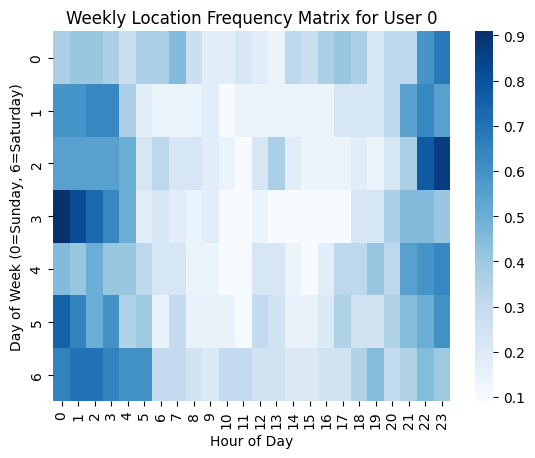

In [11]:
uid_to_plot = 0  # Change this to view the matrix for different users
sns.heatmap(user_matrices, annot=False, cmap="Blues", cbar=True)
plt.title(f'Weekly Location Frequency Matrix for User {uid_to_plot}')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Sunday, 6=Saturday)')
plt.show()

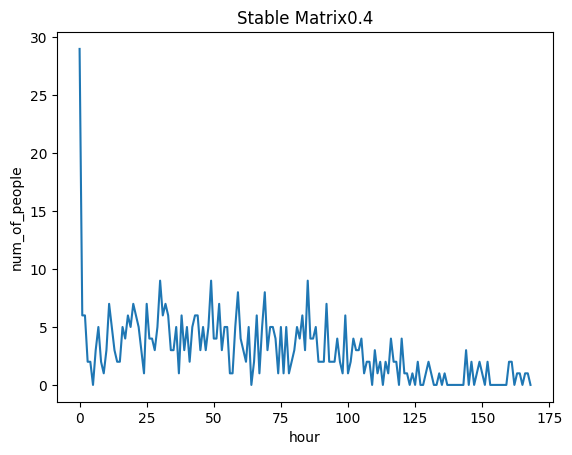

In [49]:
# 繪製 stable_matrix
percent_str = str(percent)
plt.plot(stable_matrix[0])
plt.title('Stable Matrix' + percent_str)
plt.xlabel('hour')
plt.ylabel('num_of_people')
plt.show()